# 演習　CTデータのVisualization

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from glob import glob
from tqdm import tqdm
import ctvis
%matplotlib inline

## EDA

### pathをDataFrameにする

In [2]:
df = ctvis.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
1,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz
2,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
3,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
4,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
5,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
6,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
7,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
8,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz


### niftiデータをload

In [3]:
p = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(p)
data.shape

(630, 630, 66)

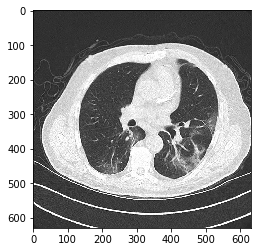

In [4]:
plt.imshow(data[:, :, 30], cmap='gray')

### ラベルを色わけする

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


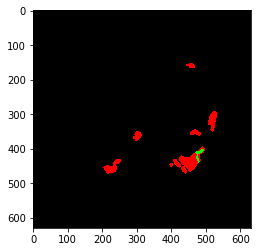

In [5]:
p = df['FilePathMask'].iloc[0]
data = ctvis.load_nifti(p)
mask_color = ctvis.label_color(data)
plt.imshow(mask_color[:, :, 30])

### CTのHU値をGrayScaleにする

In [6]:
gray_volume = ctvis.hu_to_gray(data)
gray_volume.shape

(630, 630, 66, 3)

### アノテーションMaskをCTにOverlayする

In [7]:
im_p = df['FilePathImage'].iloc[0]
msk_p = df['FilePathMask'].iloc[0]
im_data = ctvis.load_nifti(im_p)
gray_data = ctvis.hu_to_gray(im_data)
msk_data = ctvis.load_nifti(msk_p)
msk_color = ctvis.label_color(msk_data)
overlayed = ctvis.overlay(gray_data, msk_data, msk_color, alpha=0.3)

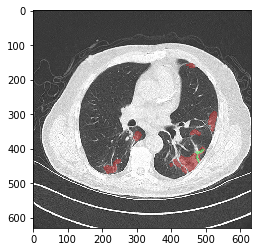

In [8]:
plt.imshow(overlayed[:, :, 30])

### 各スライスのOverlayをディスプレイする

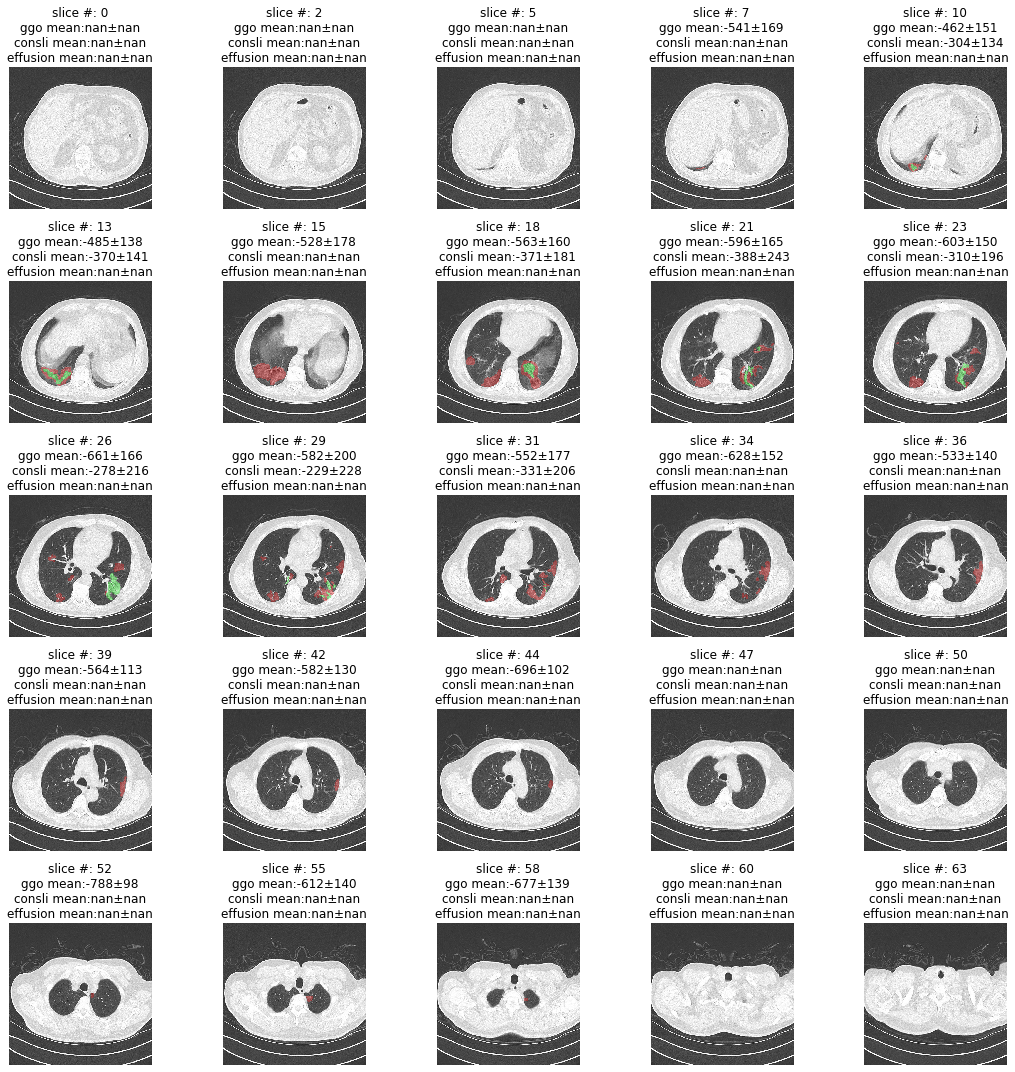

In [10]:
ctvis.vis_overlay(overlayed, im_data, msk_data)